In [2]:
#PRIMERO debemos leer la data
import pandas as pd
import numpy as np
import matplotlib as plt


df = pd.read_csv('baby.csv')
print(df.head())
# Obtener información sobre los tipos de datos y los valores no nulos
print(df.info())

# Estadísticas descriptivas
print(df['Birth.Weight'].describe().round(3))

   Unnamed: 0  Birth.Weight  Gestational.Days  ...  Maternal.Height  Maternal.Pregnancy.Weight  Maternal.Smoker
0           1           120               284  ...               62                        100            False
1           2           113               282  ...               64                        135            False
2           3           128               279  ...               64                        115             True
3           4           108               282  ...               67                        125             True
4           5           136               286  ...               62                         93            False

[5 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 n

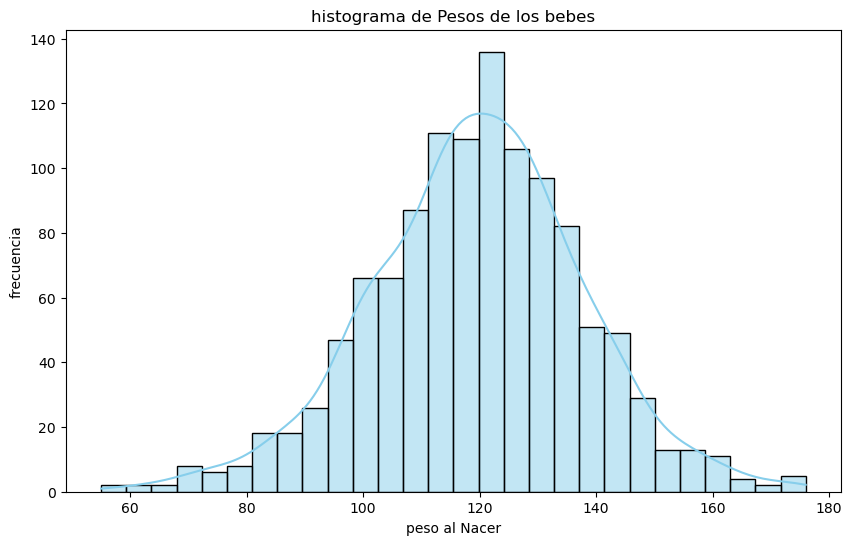

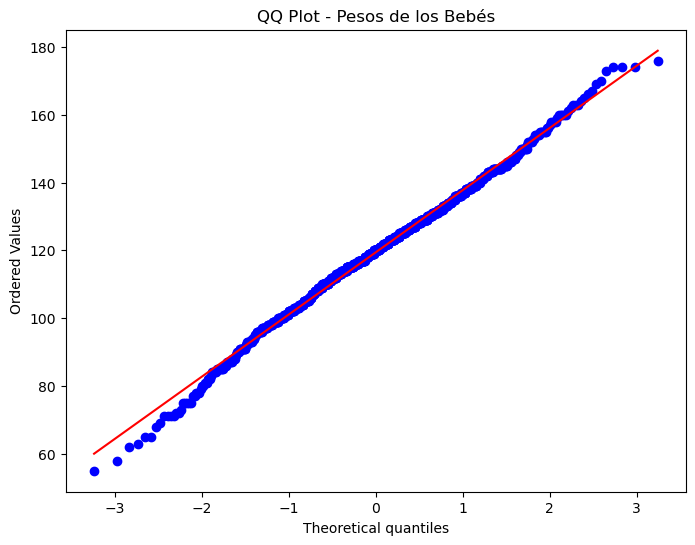

Estadístico de Shapiro-Wilk: 0.9956281185150146, p-value: 0.00191177474334836


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Visualizar histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Birth.Weight'], kde=True, color='skyblue')
plt.title('histograma de pesos de los bebes')
plt.xlabel('peso al nacer')
plt.ylabel('frecuencia')
plt.show()


#podemos usar
plt.figure(figsize=(8, 6))
probplot(df['Birth.Weight'], dist="norm", plot=plt)
plt.title('QQ Plot - Pesos de los Bebés')
plt.show()

#saphiro (analizamos los datos segun la distribucion de probabilidad como menciona en la guia)
stat, p = shapiro(df['Birth.Weight'])
print(f'Estadístico de Shapiro-Wilk: {stat}, p-value: {p}')

#generamos muestras de datos de una distribución normal utilizando la media y la desviacion estandar de los pesos reales de los bebes
#luego comparar estas muestras con los datos reales utilizando graficos QQ plots (En estadistica, un grafico Q-Q es un metodo grafico para el diagnostico de diferencias
#entre la distribucion de probabilidad de una poblacion de la que se haextraido una muestra aleatoria y una distribucion usada para la comparacion)

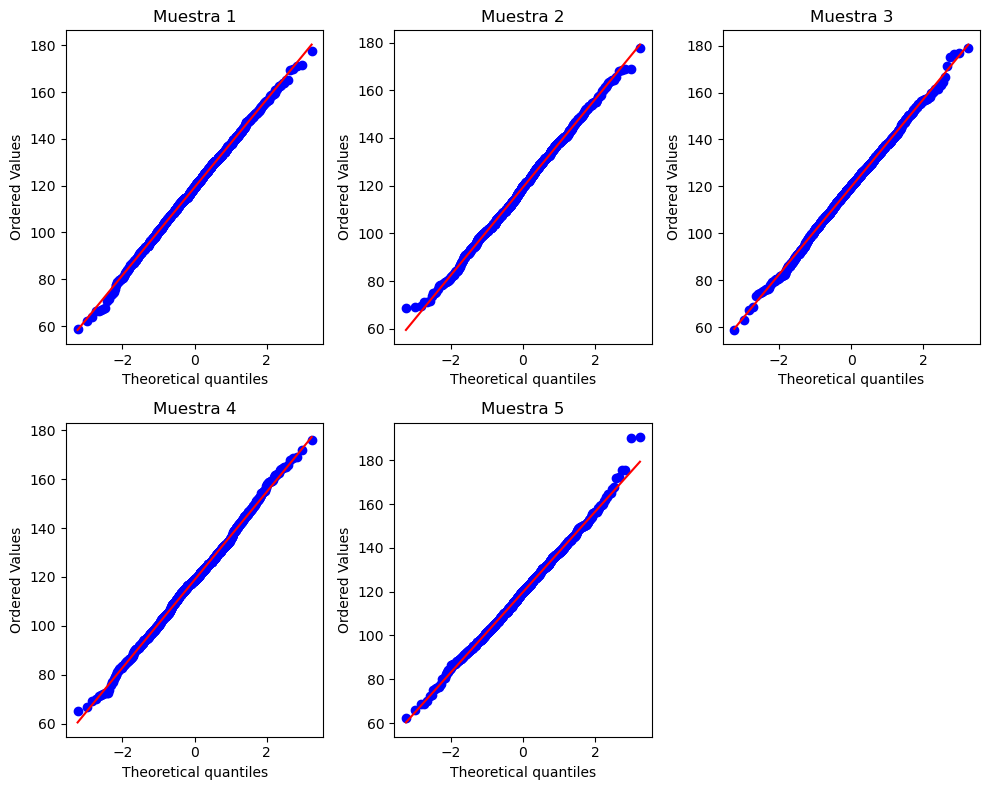

In [7]:
#calculamos la media y la desviacion estandar de los pesos reales de los bebes
media_pesos = df['Birth.Weight'].mean()
std_pesos = df['Birth.Weight'].std()

#generamos las 5 muestras con la desviacion estandar y misma media las iteramos en un rango solicitado 
#segund el desafio (5)
muestras_generadas = [np.random.normal(media_pesos, std_pesos, len(df)) for _ in range(5)]

#comparamos las muestras generadas con los datos reales utilizando graficos QQ plots
plt.figure(figsize=(10, 8))
for i, muestra in enumerate(muestras_generadas, 1):
    plt.subplot(2, 3, i)
    probplot(muestra, dist="norm", plot=plt)
    plt.title(f'muestra {i}')
plt.tight_layout()
plt.show()


Estadisticas descriptivas para bebes de madres fumadoras:
count    459.000000
mean     113.819172
std       18.295010
min       58.000000
25%      101.000000
50%      115.000000
75%      126.000000
max      163.000000
Name: Birth.Weight, dtype: float64

Estadisticas descriptivas para bebes de madres no fumadoras:
count    715.000000
mean     123.085315
std       17.423695
min       55.000000
25%      113.000000
50%      123.000000
75%      134.000000
max      176.000000
Name: Birth.Weight, dtype: float64


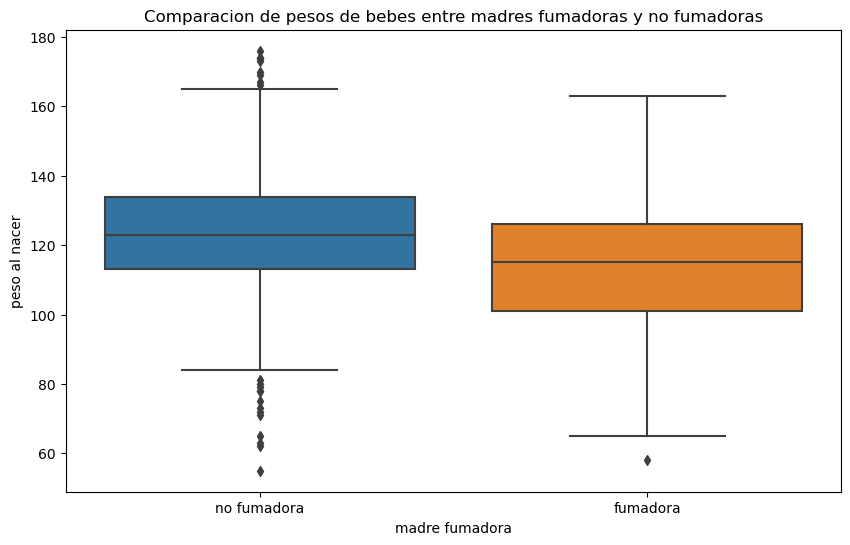

Prueba de Shapiro-Wilk para bebes de madres fumadoras: Estadístico=0.9969505071640015, p-value=0.5490781664848328
Prueba de Shapiro-Wilk para bebes de madres no fumadoras: Estadístico=0.9886102676391602, p-value=2.350948670937214e-05

Comparación de pesos de bebés entre madres fumadoras y no fumadoras utilizando Prueba de Mann-Whitney U:
Estadístico=115215.0, p-value=6.485236024220473e-18
Hay una diferencia significativa en los pesos de los bebés entre madres fumadoras y no fumadoras.


In [14]:
#para comparar los pesos de los bebes de madres fumadoras y no fumadoras, podemos utilizar pruebas estadisticas 
#como la prueba t de Student o la prueba de Mann-Whitney U, dependiendo de la normalidad de los datos
#esta informacion la obtuve de otros modelos y estudiamos ambos test

#primero, realizamos una comparacion y division de datos entre las madres fumadoras y no fumadoras
from scipy.stats import ttest_ind, mannwhitneyu

# Dividir el conjunto de datos en dos grupos: bebes de madres fumadoras y no fumadoras
bebes_fumadoras = df[df['Maternal.Smoker'] == True]['Birth.Weight']
bebes_no_fumadoras = df[df['Maternal.Smoker'] == False]['Birth.Weight']

#ahora exploracion inicial de los pesos de los bebes en ambos grupos, incluyendo estadisticas descriptivas y visualizaciones 
#como grficos de cajas.
print("Estadisticas descriptivas para bebes de madres fumadoras:")
print(bebes_fumadoras.describe())
print("\nEstadisticas descriptivas para bebes de madres no fumadoras:")
print(bebes_no_fumadoras.describe())

#luego revisamos la normalidad de los datos en cada grupo utilizando pruebas como la prueba de Shapiro-Wilk.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Maternal.Smoker'], y=df['Birth.Weight'])
plt.title('Comparacion de pesos de bebes entre madres fumadoras y no fumadoras')
plt.xlabel('madre fumadora')
plt.ylabel('peso al nacer')
plt.xticks(ticks=[0, 1], labels=['no fumadora', 'fumadora'])
plt.show()

#por ultimo hacemos la prueba de la normalidad, esta sera mas extensa ya que seguimos analizando y difirenciando entre ambos
#tipos de madres
stat_fumadoras, p_fumadoras = shapiro(bebes_fumadoras)
stat_no_fumadoras, p_no_fumadoras = shapiro(bebes_no_fumadoras)
print(f'Prueba de Shapiro-Wilk para bebes de madres fumadoras: Estadístico={stat_fumadoras}, p-value={p_fumadoras}')
print(f'Prueba de Shapiro-Wilk para bebes de madres no fumadoras: Estadístico={stat_no_fumadoras}, p-value={p_no_fumadoras}')

# Comparación de los pesos de los bebés entre madres fumadoras y no fumadoras
if p_fumadoras > 0.05 and p_no_fumadoras > 0.05:
    # Si los datos son normales, usar la prueba t de Student
    stat, p = ttest_ind(bebés_fumadoras, bebés_no_fumadoras)
    test_type = "Prueba t de Student"
else:
    # Si los datos no son normales, usar la prueba de Mann-Whitney U
    stat, p = mannwhitneyu(bebes_fumadoras, bebes_no_fumadoras)
    test_type = "Prueba de Mann-Whitney U"

print(f'\nComparación de pesos de bebés entre madres fumadoras y no fumadoras utilizando {test_type}:')
print(f'Estadístico={stat}, p-value={p}')
if p < 0.05:
    print("Hay una diferencia significativa en los pesos de los bebés entre madres fumadoras y no fumadoras.")
else:
    print("No hay una diferencia significativa en los pesos de los bebés entre madres fumadoras y no fumadoras.")

In [17]:
#construir un modelo de distribucion binomial para el experimento de escoger 5 madres al azar
import scipy.stats as stats
n_madres = 5  # numero de ensayos (escoger 5 madres al azar)
probabilidad_fumadora = df['Maternal.Smoker'].mean()
p_fumadora = probabilidad_fumadora  #probabilidad de exito (madre fumadora)

#modelo de distribucion binomial
binomial_model = stats.binom(n_madres, p_fumadora)

#siimulamos 1000 muestras de tamaño 8 y calcular las medias muestrales
tamano_muestra = 8
medias_muestrales = []
for _ in range(1000):
    muestra = np.random.binomial(n_madres, p_fumadora, tamano_muestra)
    media_muestral = np.mean(muestra)
    medias_muestrales.append(media_muestral)

#imprimimos las 10medias muestrales
print("Primeras 10 medias muestrales:")
print(medias_muestrales[:10])


Primeras 10 medias muestrales:
[2.125, 1.75, 2.5, 1.625, 2.0, 1.75, 2.375, 1.875, 1.375, 1.75]


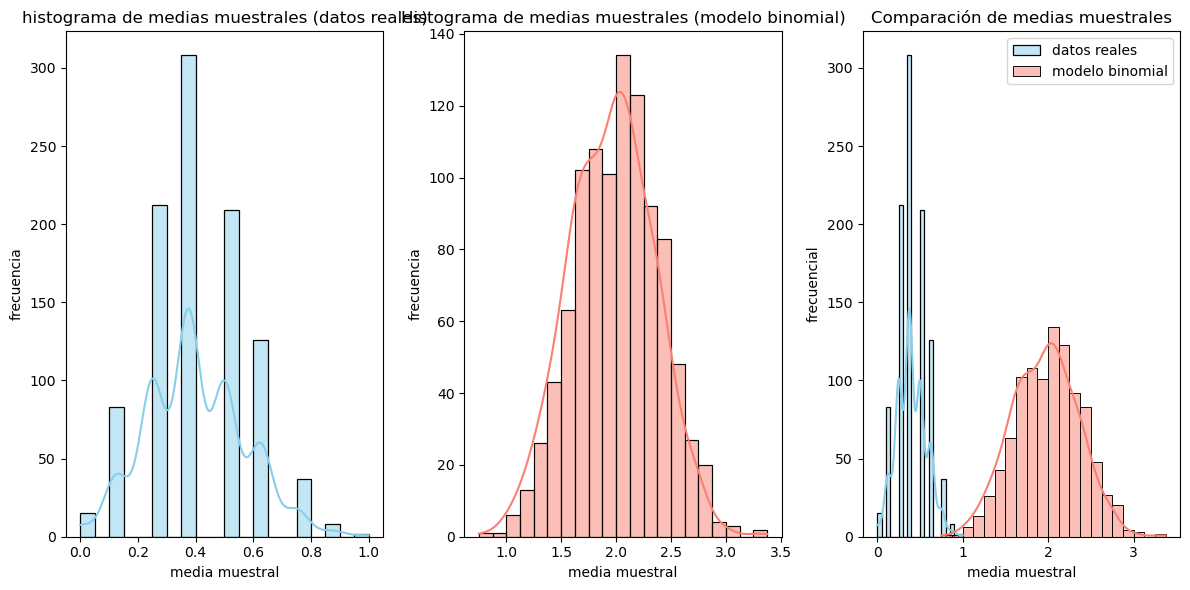

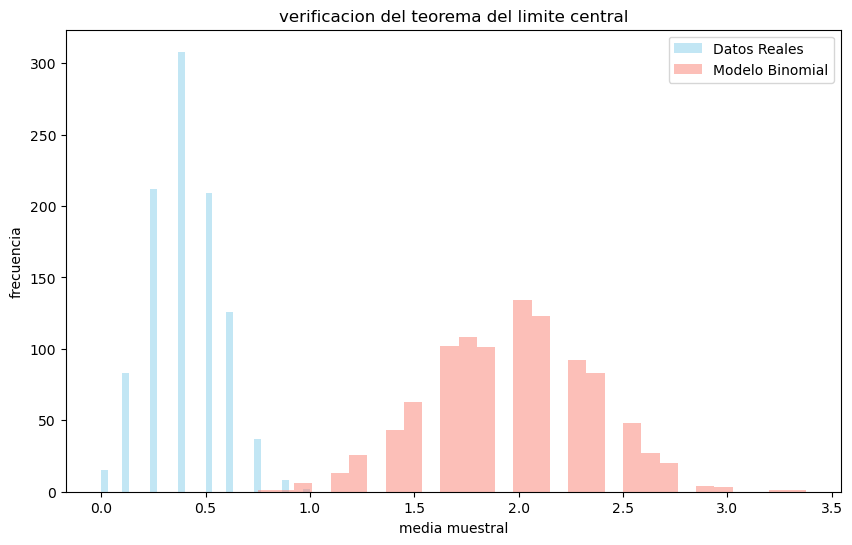

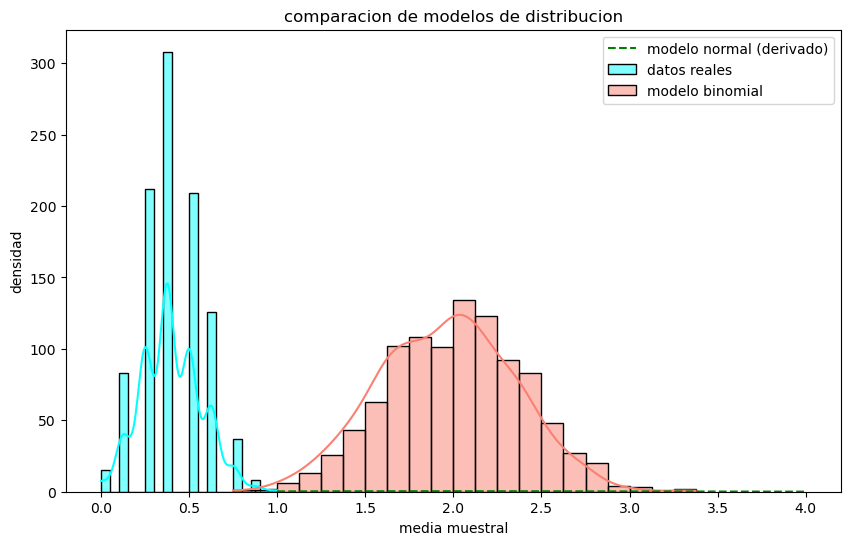

In [22]:
#comparacion grafica de los resultados anteriores
plt.figure(figsize=(12, 6))

#histograma de las medias muestrales de las muestras de datos reales
#simulamos 1000 muestras de tamaño 8 y calcular las medias muestrales
tamano_muestra = 8
medias_muestrales_reales = []
for _ in range(1000):
    muestra = np.random.choice(df['Maternal.Smoker'], size=tamano_muestra, replace=True)
    media_muestral = muestra.mean()
    medias_muestrales_reales.append(media_muestral)

plt.subplot(1, 3, 1)
sns.histplot(medias_muestrales_reales, kde=True, color='skyblue')
plt.title('histograma de medias muestrales (datos reales)')
plt.xlabel('media muestral')
plt.ylabel('frecuencia')




#histograma de las medias muestrales de las muestras simuladas con el modelo 
#simulamos 1000 muestras de tamaño 8 y calcular las medias muestrales
tamano_muestra = 8
medias_muestrales_binomiales = []
for _ in range(1000):
    muestra = np.random.binomial(n_madres, p_fumadora, tamano_muestra)
    media_muestral = np.mean(muestra)
    medias_muestrales_binomiales.append(media_muestral)

plt.subplot(1, 3, 2)
sns.histplot(medias_muestrales_binomiales, kde=True, color='salmon')
plt.title('Histograma de medias muestrales (modelo binomial)')
plt.xlabel('media muestral')
plt.ylabel('frecuencia')

#comparamos las medias muestrales de las muestras reales y simuladas
plt.subplot(1, 3, 3)
sns.histplot(medias_muestrales_reales, kde=True, color='skyblue', label='datos reales')
sns.histplot(medias_muestrales_binomiales, kde=True, color='salmon', label='modelo binomial')
plt.title('Comparación de medias muestrales')
plt.xlabel('media muestral')
plt.ylabel('frecuencial')
plt.legend()

plt.tight_layout()
plt.show()

#verificamos el teorema del limite central
plt.figure(figsize=(10, 6))
plt.hist(medias_muestrales_reales, bins=30, alpha=0.5, color='skyblue', label='Datos Reales')
plt.hist(medias_muestrales_binomiales, bins=30, alpha=0.5, color='salmon', label='Modelo Binomial')
plt.title('verificacion del teorema del limite central')
plt.xlabel('media muestral')
plt.ylabel('frecuencia')
plt.legend()
plt.show()

#contruimos un modelo de distribución normal apartir del modelo binomial
#esto es segun las formulas otorgadas en la guia entregada y fuentes de libros en linea sobre probabilidades y estadisticas
#si se encuentra un error usado en la formula informar para mejorar y saber en lo que estoy equivocado
media_binomial = n_madres * p_fumadora
std_binomial = np.sqrt(n_madres * p_fumadora * (1 - p_fumadora))
normal_model = stats.norm(media_binomial, std_binomial)

#comparacion grafica de los modelos de distribución normal y las distribuciones anteriores
plt.figure(figsize=(10, 6))
sns.histplot(medias_muestrales_reales, kde=True, color='cyan', label='datos reales')
sns.histplot(medias_muestrales_binomiales, kde=True, color='salmon', label='modelo binomial')
x = np.linspace(1, 4, 100)
plt.plot(x, normal_model.pdf(x), color='green', linestyle='--', label='modelo normal (derivado)')
plt.title('comparacion de modelos de distribucion')
plt.xlabel('media muestral')
plt.ylabel('densidad')
plt.legend()
plt.show()
